In [75]:
import nltk
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [76]:
import numpy as np
from nltk.stem import WordNetLemmatizer
import json
import pickle
import random
lemmatizer=WordNetLemmatizer()

In [77]:
words=[]
classes=[]
documents=[]
ignore_words=[ '?', '@', '!', ',', '.', ';', ':', '#', '$', '%', '^', '&', '*', '(', ')', '[', ']', '{', '}', '...',]

In [78]:
dataset=open('intents.json').read()
intents=json.loads(dataset)



Extracting the data from json file

In [79]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        word_token=nltk.word_tokenize(pattern)
        words.extend(word_token)
        
        documents.append((word_token,intent['tag']))
        
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

words=[lemmatizer.lemmatize(word.lower()) for word in words if word not in ignore_words] 
words=sorted(list(set(words)))
classes=sorted(list(set(classes)))

print("Words:",words)
print("Classes:",classes)
print("Documents:",documents)
    

Words: ['a', 'abdonominal', 'abrasion', 'allergy', 'am', 'an', 'animal', 'anyone', 'apply', 'are', 'better', 'bit', 'bite', 'bitten', 'bleed', 'bleeding', 'blocked', 'bring', 'broken', 'bruise', 'burn', 'by', 'bye', 'cause', 'chemical', 'choke', 'choked', 'choking', 'cold', 'congestion', 'cough', 'cpr', 'cream', 'cure', 'cut', 'cya', 'day', 'diagnose', 'diarrhea', 'do', 'doe', 'dog', 'drowned', 'drowning', 'due', 'exhausted', 'exhaustion', 'eye', 'faint', 'fainting', 'feel', 'fever', 'for', 'fracture', 'frost', 'gas', 'gastrointestinal', 'get', 'give', 'good', 'goodbye', 'got', 'have', 'head', 'headache', 'heat', 'hello', 'help', 'hi', 'how', 'i', 'ice', 'if', 'in', 'injured', 'injury', 'insect', 'is', 'last', 'later', 'leaving', 'like', 'long', 'me', 'medicine', 'mild', 'monekey', 'monkey', 'muscle', 'my', 'nasal', 'nose', 'of', 'on', 'or', 'pain', 'person', 'poison', 'poisoned', 'poisoning', 'problem', 'pulled', 'rash', 'rectal', 'remove', 'rid', 'scar', 'see', 'seizure', 'skin', 'sn

In [80]:
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

Training Process


In [81]:
training=[]
output_empty=[0]*len(classes)

for document in documents:
    bag_of_words=[]
    
    pattern_words=document[0]
    pattern_words=[lemmatizer.lemmatize(w.lower()) for w in pattern_words]
    
    for w in words:
        if w in pattern_words:
            bag_of_words.append(1)
        else:
            bag_of_words.append(0)
    
    output_row=list(output_empty)
    output_row[classes.index(document[1])]=1
    
    training.append([bag_of_words,output_row])
    
random.shuffle(training)
training=np.array(training,dtype=object)


In [82]:
x_train=list(training[:,0])
y_train=list(training[:,1])

In [83]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LeakyReLU
from keras.optimizers import SGD
from keras import initializers

#Initialize the model
ann=Sequential()

#Input layer
ann.add(Dense(128,activation='relu',input_shape=(len(x_train[0]),),kernel_initializer=initializers.he_normal()))
ann.add(LeakyReLU(alpha=0.01))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

#Hidden layer
ann.add(Dense(64, kernel_initializer=initializers.he_normal(),activation='relu'))
ann.add(LeakyReLU(alpha=0.01))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

#output layer
ann.add(Dense(len(y_train[0]),activation='softmax'))

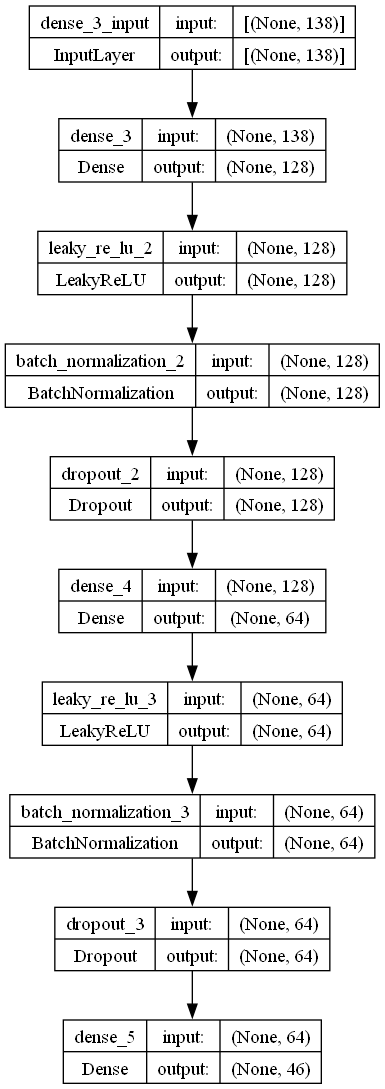

In [84]:
#Visualize the ANN Model
from keras.utils import plot_model

plot_model(ann, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)

In [85]:
sgd = SGD(
    learning_rate=0.005,  
    momentum=0.9,       
    nesterov=True,       
    weight_decay=1e-6    
)
ann.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=["accuracy"])

In [86]:
x_train=np.array(x_train)
y_train=np.array(y_train)
history=ann.fit(x_train,y_train,epochs=200,batch_size=5,verbose=1)


Epoch 1/200
40/40 [==============================] - 2s 4ms/step - loss: 4.8970 - accuracy: 0.0151
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 4.1251 - accuracy: 0.0553
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 4.0375 - accuracy: 0.0452
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 3.6659 - accuracy: 0.0854
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 3.4624 - accuracy: 0.1508
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 3.4116 - accuracy: 0.1357
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 3.2504 - accuracy: 0.1658
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 3.2197 - accuracy: 0.2161
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 3.0784 - accuracy: 0.2060
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 2.8512 - accuracy: 0.2663
Epoch 11/

In [88]:
final_training_accuracy = history.history['accuracy'][-1]
print(f'Final Training Accuracy: {final_training_accuracy * 100:.2f}%')

Final Training Accuracy: 87.94%


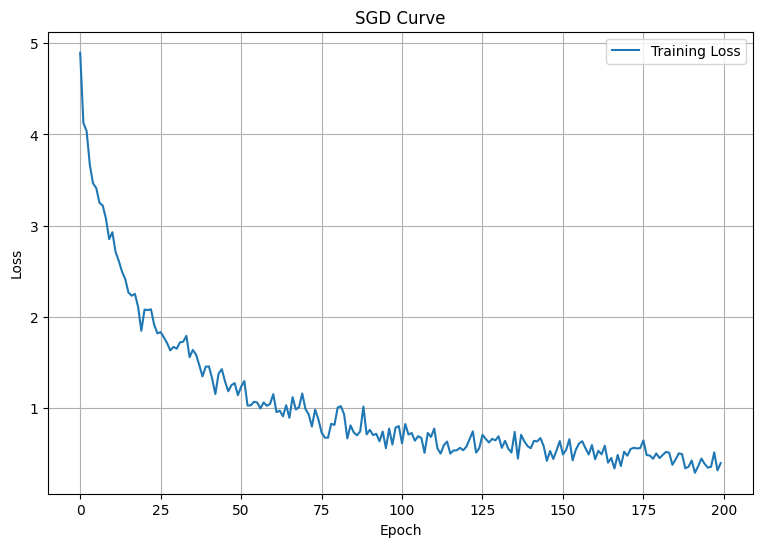

In [95]:

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('SGD Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

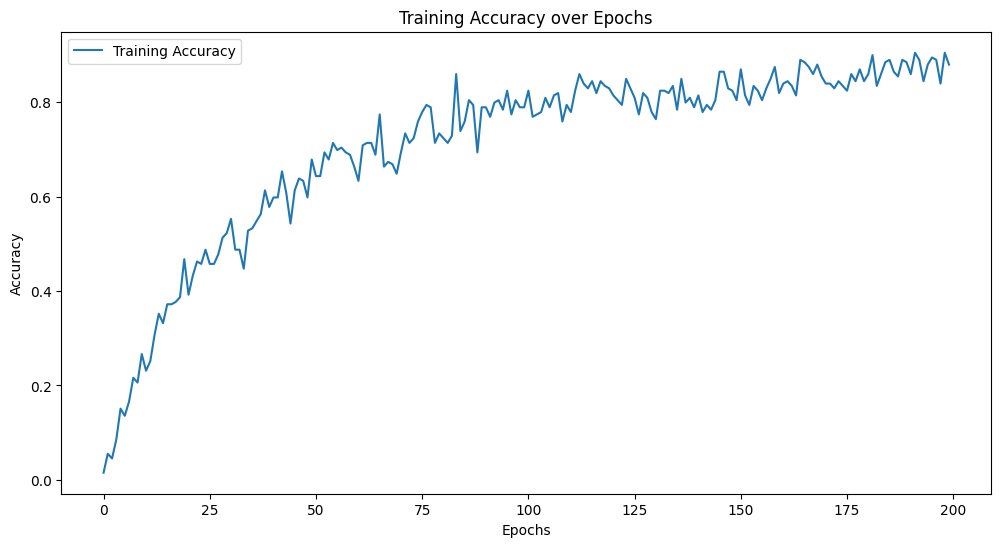

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Saving the model


In [90]:
ann.save('chatbot_model.h5',history)

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
